Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,Would_live_in_another_neighborhood,District,Gender,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,Barri_satisfaction_of_living,BCN_satisfaction_of_living,...,Financial_situation,Help_with_housework,Disability,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,0.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS THE SAME,IT WILL GET WORSE,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,SATISFIED,...,BAD,0.0,0.0,0,1,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,0,0,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,FAIRLY SATISFIED,SATISFIED,...,BAD,0.0,1.0,1,0,0,1,0,0,0
5,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,IT WILL STAY THE SAME,IT WILL IMPROVE,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,1,0,1,0,0,0,0


In [5]:
data.shape

(1174, 31)

In [6]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [7]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,1019,0
1.0,0,155


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,61,8
EIXAMPLE,179,20
GRÀCIA,84,12
HORTA - GUINARDÓ,112,21
LES CORTS,104,4
NOU BARRIS,94,23
SANT ANDREU,83,22
SANT MARTÍ,129,18
SANTS - MONTJUÏC,80,22


Would_live_in_another_neighborhood,0.0,1.0
Gender,,
0,399,61
1,620,94


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,136,7
LESS THAN 10 YEARS,57,16
MORE THAN 10 YEARS,826,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,411,59
IT IS THE SAME,378,50
IT IS WORSE,230,46


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,272,36
IT IS THE SAME,230,34
IT IS WORSE,517,85


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL GET WORSE,154,31
IT WILL IMPROVE,577,79
IT WILL STAY THE SAME,288,45


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL GET WORSE,232,31
IT WILL IMPROVE,546,92
IT WILL STAY THE SAME,241,32


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction_of_living,,
FAIRLY SATISFIED,75,25
NOT SATISFIED,1,9
SATISFIED,943,121


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction_of_living,,
FAIRLY SATISFIED,118,22
NOT SATISFIED,8,1
SATISFIED,893,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_citizen_security,,
BAD,152,40
GOOD,455,49
"NEITHER BAD, NOR GOOD",412,66


Would_live_in_another_neighborhood,0.0,1.0
BCN_citizen_security,,
BAD,199,40
GOOD,285,38
"NEITHER BAD, NOR GOOD",535,77


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,65,17
GOOD,509,56
"NEITHER BAD, NOR GOOD",445,82


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,96,21
GOOD,431,46
"NEITHER BAD, NOR GOOD",492,88


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",341,94
ONE OF THE BEST,649,41
ONE OF THE WORST,29,20


Would_live_in_another_neighborhood,0.0,1.0
Barri_association,,
0.0,805,128
1.0,214,27


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,149,22
GOOD,812,120
"NEITHER BAD, NOR GOOD",58,13


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,95,21
GOOD,824,125
"NEITHER BAD, NOR GOOD",100,9


Would_live_in_another_neighborhood,0.0,1.0
Owns_a_car,,
0,479,63
1,540,92


Would_live_in_another_neighborhood,0.0,1.0
House_owner,,
0.0,210,28
1.0,809,127


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,126,15
51-100 M2,724,115
< 50 M2,57,14
> 150 M2,43,5
I DON'T KNOW,69,6


Would_live_in_another_neighborhood,0.0,1.0
Financial_situation,,
BAD,390,63
GOOD,629,92


Would_live_in_another_neighborhood,0.0,1.0
Help_with_housework,,
0.0,656,110
1.0,363,45


Would_live_in_another_neighborhood,0.0,1.0
Disability,,
0.0,856,121
1.0,163,34


Would_live_in_another_neighborhood,0.0,1.0
Living_with_disabled_person,,
0,722,105
1,297,50


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,913,140
1,106,15


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,871,126
1,148,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction_of_living,,
0,968,126
1,51,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,941,147
1,78,8


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,1013,155
1,6,0


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_citizen_security,,
0,1015,153
1,4,2


In [8]:
x_var = data.columns.tolist()

In [9]:
x_var

['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [10]:
for i in ['Would_live_in_another_neighborhood']:
    x_var.remove(i)

In [63]:
x_var = ['Time_living_in_barri',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'Barri_association',
 'Owns_a_car']
x = data[x_var]

In [64]:
y = data['Would_live_in_another_neighborhood']

In [65]:
x = pd.get_dummies(x, drop_first=True)

In [66]:
x.columns.tolist()

['Barri_association',
 'Owns_a_car',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_satisfaction_of_living_NOT SATISFIED',
 'Barri_satisfaction_of_living_SATISFIED',
 'Barri_comparison_ONE OF THE BEST',
 'Barri_comparison_ONE OF THE WORST']

In [67]:
x = sm.add_constant(x)

In [68]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.337654
         Iterations 7
                                      Results: Logit
Model:                 Logit                                Pseudo R-squared:   0.135     
Dependent Variable:    Would_live_in_another_neighborhood   AIC:                810.8113  
Date:                  2021-05-03 21:03                     BIC:                856.4248  
No. Observations:      1174                                 Log-Likelihood:     -396.41   
Df Model:              8                                    LL-Null:            -458.12   
Df Residuals:          1165                                 LLR p-value:        6.4811e-23
Converged:             1.0000                               Scale:              1.0000    
No. Iterations:        7.0000                                                             
------------------------------------------------------------------------------------------
                          

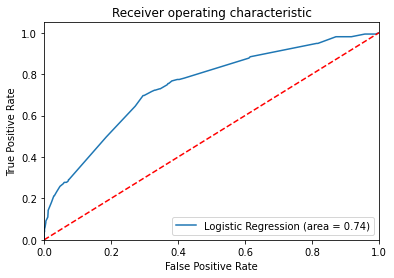

In [69]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [61]:
result.pvalues.sort_values(ascending=False)

BCN_over_barri_transport                        9.265721e-01
BCN_over_barri_evolution                        8.100908e-01
Social_class_LOW                                7.228847e-01
Barri_future_IT WILL STAY THE SAME              6.506681e-01
Help_with_housework                             6.242893e-01
Gender                                          6.240309e-01
Social_class_MIDDLE-LOW                         6.181223e-01
Number_of_people_in_the_house_ONE               5.825976e-01
Barri_future_IT WILL IMPROVE                    5.621098e-01
Social_class_I DON'T KNOW                       5.247955e-01
Social_class_MIDDLE-MIDDLE                      5.205856e-01
Place_of_birth_FOREIGN                          4.718360e-01
Barri_transport_GOOD                            4.714347e-01
Barri_management_NEITHER BAD, NOR GOOD          4.497609e-01
Barri_transport_NEITHER BAD, NOR GOOD           4.338004e-01
Barri_citizen_security_NEITHER BAD, NOR GOOD    3.835724e-01
Social_class_MIDDLE-HIGH

In [42]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_live_in_another_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Gender                                          -0.0094      0.020     -0.469      0.639      -0.049       0.030
Barri_association                               -0.0477      0.025     -1.903      0.057      -0.097       0.001
Owns_a_car                                       0.0269      0.022      1.212      0.226      -0.017       0.070
House_owner                                      0.0205      0.027      0.763      0.445      -0.032       0.073
Help_with_housework                             -0.0003      0.022     -0.016      0.988      -0.043      

In [45]:
result.pred_table()

array([[1020.,   12.],
       [ 133.,   26.]])

In [48]:
result.pred_table(threshold=0.2)

array([[856., 176.],
       [ 69.,  90.]])

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()